<a href="https://colab.research.google.com/github/Giuseppe31-s/Geracao-Tech-Unimed-BH-Ciencia-de-Dados/blob/main/Python%20para%20ci%C3%AAncia%20de%20dados/Data_Science_an%C3%A1lise_para_sa%C3%BAde_e_medicina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


In [ ]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1604712,1620869,1636455,1651673,1666545,1680985,1694874,1714742,1731257,1746092,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393,1930428,1958719,1975444,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208,2218137,2233287,2263053,2275727
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,467682,467682,467682,467682,468619,469452,469748,469748,469748,469748,469748,469748,471090,471414,471414,471414,471414,471414,472910,473302,473302,474234,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444,504992,504992,504992,524716
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10105,10109,10111,10115,10118,10123,10125,10126,10126,10127,10130,10138,10143,10146,10152,10159,10178,10197,10197,10208,10220,10233,10233,10233,10252,10352,10408,10449,10507,10585,10585,1058

In [ ]:
confirmed['Country/Region'].value_counts()

China             34
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: Country/Region, Length: 196, dtype: int64

In [ ]:
confirmed_by_country = confirmed.groupby('Country/Region').sum()
confirmed_by_country.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,...,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116


In [ ]:
confirmed_by_country.loc['China']

Lat          1085.2923
Long         3688.9377
1/22/20       548.0000
1/23/20       643.0000
1/24/20       920.0000
              ...     
1/27/22    119404.0000
1/28/22    119546.0000
1/29/22    119707.0000
1/30/22    119831.0000
1/31/22    119963.0000
Name: China, Length: 743, dtype: float64

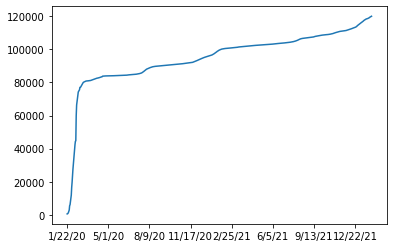

In [ ]:
confirmed_by_country.loc['China'][2:].plot()

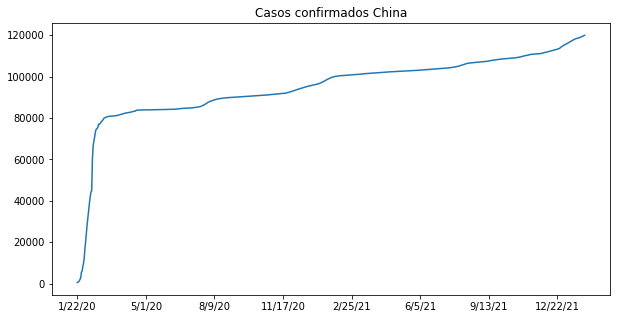

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
confirmed_by_country.loc['China'][2:].plot()

plt.title('Casos confirmados China');


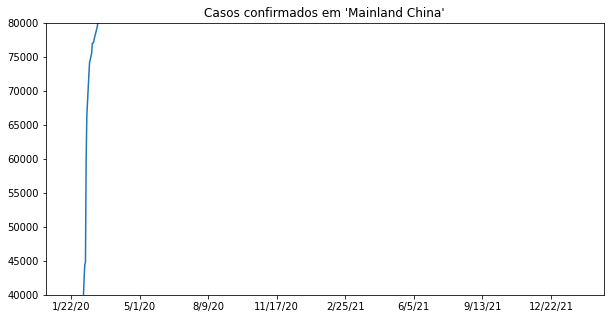

In [ ]:
#cuidado com o data visualization
plt.figure(figsize=(10,5))
confirmed_by_country.loc["China"][2:].plot()
plt.title("Casos confirmados em 'Mainland China'")
plt.ylim(40000, 80000)
plt.show()

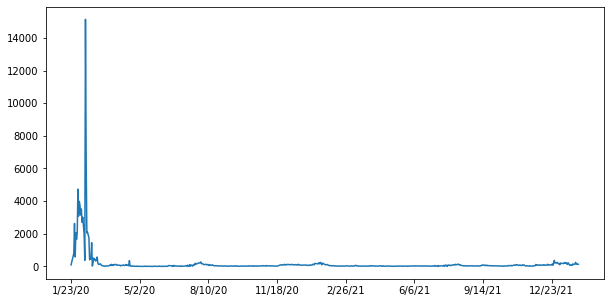

In [ ]:

new_cases_china = confirmed_by_country.loc["China"][2:].diff().dropna()
plt.figure(figsize = (10,5))
new_cases_china.plot()


Text(0.5, 1.0, 'Confirmados por país')

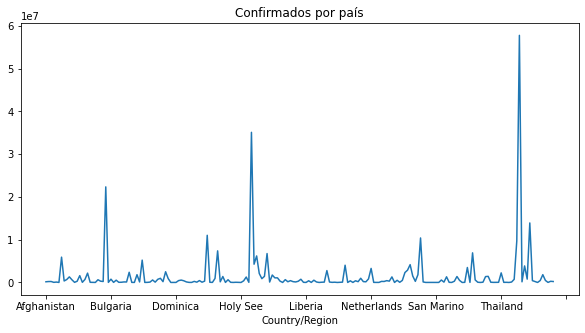

In [ ]:
#Não faz sentido usar gráfico de linha entre os países 
plt.figure(figsize=(10,5))
confirmed_by_country['1/5/22'].plot()
plt.title("Confirmados por país")

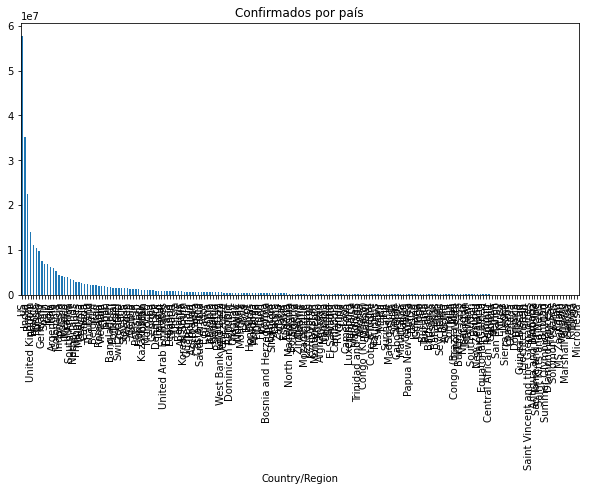

In [ ]:
plt.figure(figsize=(10,5))

confirmed_by_country['1/5/22'].sort_values(ascending=False).plot(kind='bar')
plt.title("Confirmados por país")
plt.show()

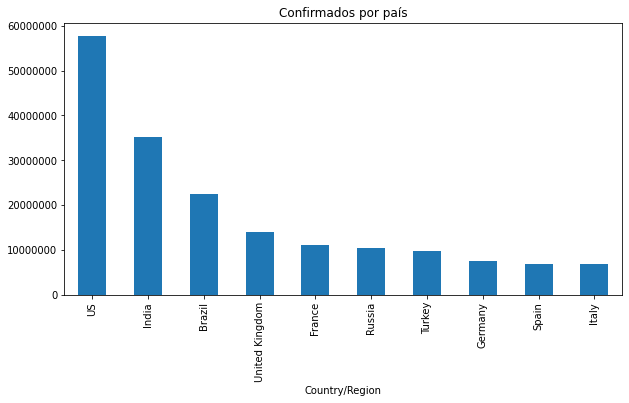

In [ ]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
plt.figure(figsize=(10,5))

ax = confirmed_by_country['1/5/22'].sort_values(ascending=False)[:10].plot(kind='bar')
plt.title("Confirmados por país")
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()

In [ ]:
new_cases_china

1/23/20     95.0
1/24/20    277.0
1/25/20    486.0
1/26/20    669.0
1/27/20    802.0
           ...  
1/27/22    252.0
1/28/22    142.0
1/29/22    161.0
1/30/22    124.0
1/31/22    132.0
Name: China, Length: 740, dtype: float64

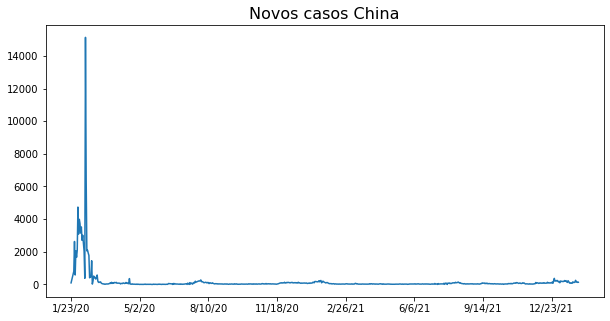

In [ ]:
plt.figure(figsize=(10,5))
new_cases_china.plot()
plt.title('Novos casos China',fontdict={'fontsize':16});

In [ ]:
a = confirmed.columns[4:]

In [ ]:
new_cases_country = confirmed.groupby('Country/Region').sum()[a].diff(axis = 1)

In [ ]:
new_cases_country['1/5/22']

Country/Region
Afghanistan              40
Albania                   0
Algeria                 462
Andorra                 487
Angola                 1970
                      ...  
Vietnam               17017
West Bank and Gaza      324
Yemen                     3
Zambia                 4512
Zimbabwe               1379
Name: 1/5/22, Length: 196, dtype: int64

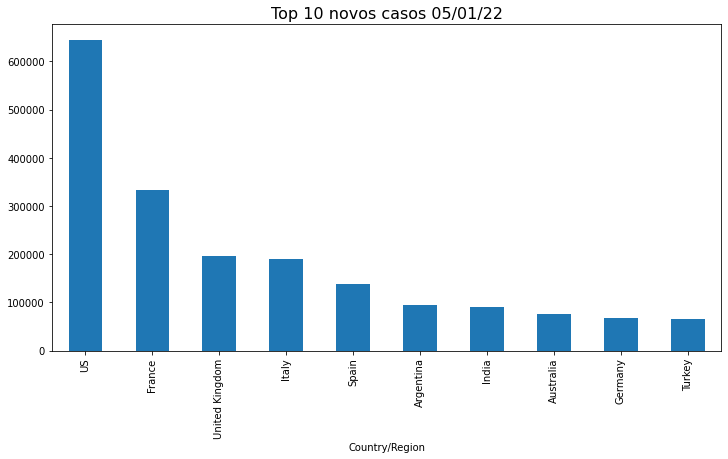

In [ ]:
plt.figure(figsize=(12,6))
new_cases_country['1/5/22'].sort_values(ascending = False)[:10].plot(kind = 'bar')
plt.title('Top 10 novos casos 05/01/22',fontdict= {'fontsize':16});

In [ ]:
new_cases_country['1/5/22'].sort_values(ascending = False)[:10]

Country/Region
US                644364
France            332308
United Kingdom    195235
Italy             189088
Spain             137180
Argentina          95159
India              90928
Australia          75426
Germany            67337
Turkey             66467
Name: 1/5/22, dtype: int64

In [ ]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

#Função colab
display(deaths.head())
display(recovered.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7346,7348,7349,7354,7354,7355,7356,7356,7356,7356,7361,7364,7365,7367,7367,7368,7369,7373,7373,7374,7376,7376,7376,7378,7379,7381,7383,7386,7386,7390,7390,7393,7393,7397,7401,7403,7403,7405,7408,7414
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3181,3187,3189,3194,3194,3207,3212,3212,3217,3217,3220,3220,3224,3224,3228,3233,3233,3240,3241,3247,3253,3255,3262,3265,3269,3271,3277,3283,3286,3292,3297,3305,3305,3312,3317,3323,3329,3329,3334,3346
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6213,6222,6229,6238,6246,6254,6263,6271,6276,6284,6291,6298,6303,6310,6318,6325,6330,6339,6349,6363,6372,6383,6393,6404,6412,6423,6435,6443,6453,6468,6481,6495,6508,6516,6526,6539,6545,6555,6566,6579
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,139,139,139,139,139,140,140,140,140,140,140,140,141,141,141,141,141,141,141,141,141,141,142,142,142,142,142,142,144,144,144,144,144,145,145,145,145,145,145,145
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1743,1746,1746,1749,1749,1756,1760,1764,1770,1772,1772,1775,1778,1789,1799,1809,1819,1826,1832,1840,1842,1847,1852,1857,1863,1866,1870,1877,1881,1884,1886,1888,1888,1891,1892,1893,1893,1894,1895,1895


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def latest_by_country(data):
  return data.groupby('Country/Region').sum().iloc[:,-1]

In [ ]:
latest_by_country(recovered)

Country/Region
Afghanistan           0
Albania               0
Algeria               0
Andorra               0
Angola                0
                     ..
Vietnam               0
West Bank and Gaza    0
Yemen                 0
Zambia                0
Zimbabwe              0
Name: 1/31/22, Length: 196, dtype: int64

In [ ]:
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(informations, axis=1)
combined.columns = ["confirmed", "deaths", "recovered"]
combined.head()

,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,162926,7414,0
Albania,258543,3346,0
Algeria,252117,6579,0
Andorra,35958,145,0
Angola,98116,1895,0


In [ ]:
sum_up = combined.sum()
latality_rate_1 = sum_up['deaths']/ sum_up['confirmed']
print(latality_rate_1 * 100)

1.499831056672222


In [ ]:
letality_rate_1 = combined["deaths"] / combined["confirmed"] * 100
combined["letality_rate_1"] = letality_rate_1
combined.head()

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
Afghanistan,162926,7414,0,4.550532
Albania,258543,3346,0,1.294175
Algeria,252117,6579,0,2.609503
Andorra,35958,145,0,0.403248
Angola,98116,1895,0,1.931387


In [ ]:
combined[combined.index == 'Italy']

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
Italy,10983116,146498,0,1.333847


In [ ]:
import seaborn as sns
sns.set()

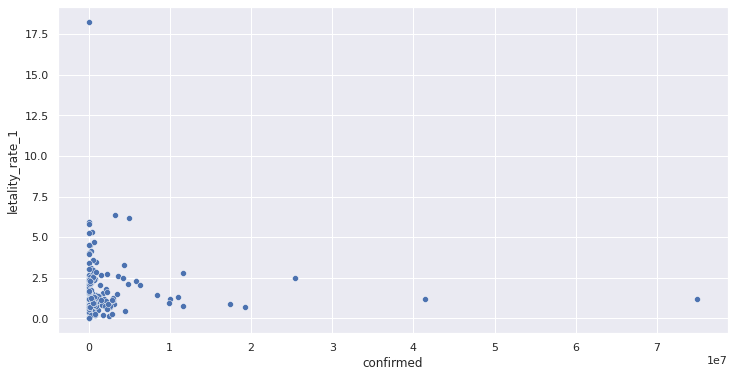

In [ ]:
ax = sns.scatterplot(data = combined.query('confirmed > 40'), x = 'confirmed', y = 'letality_rate_1')
ax.figure.set_size_inches(12,6);

In [ ]:
combined.query('letality_rate_1 > 20')

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
MS Zaandam,9,2,0,22.222222


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


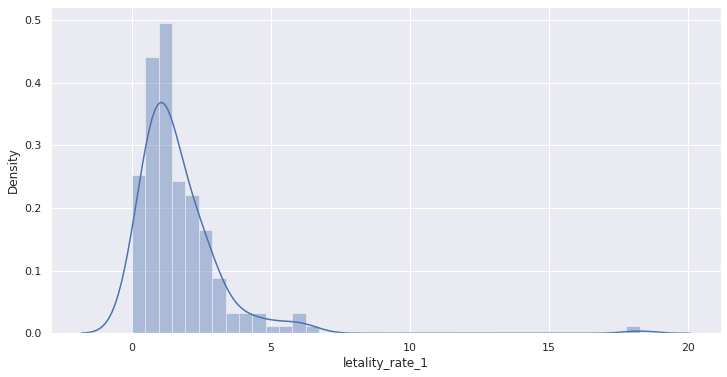

In [ ]:
ax = sns.distplot(combined.query("confirmed > 40")["letality_rate_1"])
ax.figure.set_size_inches(12,6);

In [ ]:
combined.query("letality_rate_1 > 5")

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
Egypt,425911,22635,0,5.314491
MS Zaandam,9,2,0,22.222222
Mexico,4942590,306091,0,6.192927
Peru,3224406,205505,0,6.373422
Somalia,25388,1335,0,5.258390
Sudan,57632,3441,0,5.970641
Syria,51402,2989,0,5.814949
Vanuatu,7,1,0,14.285714
Yemen,11019,2012,0,18.259370


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


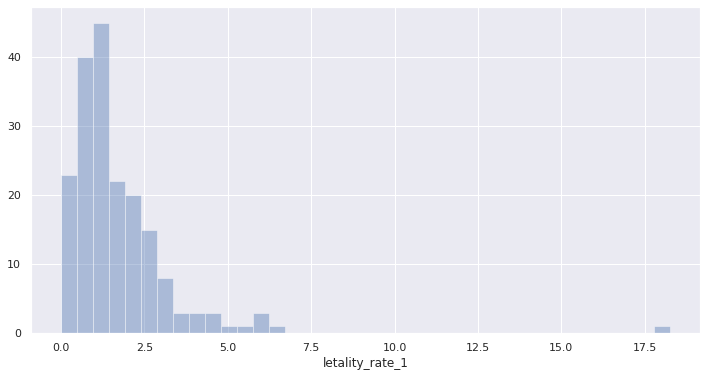

In [ ]:
ax = sns.distplot(combined.query("confirmed > 40")["letality_rate_1"], kde=False)
ax.figure.set_size_inches(12,6);

In [ ]:
combined.sort_values("letality_rate_1", ascending=False).query("confirmed > 40").head(10)

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
Yemen,11019,2012,0,18.259370
Peru,3224406,205505,0,6.373422
Mexico,4942590,306091,0,6.192927
Sudan,57632,3441,0,5.970641
Syria,51402,2989,0,5.814949
Egypt,425911,22635,0,5.314491
Somalia,25388,1335,0,5.258390
Ecuador,732038,34533,0,4.717378
Afghanistan,162926,7414,0,4.550532


In [ ]:
def latest_by_country_at(data,date):
  return data.groupby('Country/Region').sum()[date]

In [ ]:
informations = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(informations, axis=1)
combined_12.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_12.loc["China"]
letality_rate_3 = sum_up["deaths"] / sum_up["confirmed"]
print(letality_rate_3 * 100)
display(sum_up)

6.079208996577389


confirmed    36814
deaths        2238
recovered    18014
Name: China, dtype: int64

#Segunda parte

In [ ]:
confirmed_china = confirmed.loc[confirmed['Country/Region'] == 'China']

In [ ]:
confirmed_china

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009,1009
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,1205,1205,1206,1208,1208,1208,1209,1209,1211,1211,1215,1215,1216,1216,1217,1217,1218,1218,1219,1221,1222,1223,1223,1225,1226,1230,1236,1240,1247,1258,1267,1274,1282,1298,1303,1313,1318,1341,1344,1348
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,610,610,610,610,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,611,612,612,612,613,613,613,613
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,1346,1347,1350,1350,1352,1354,1358,1359,1363,1372,1372,1383,1390,1396,1397,1401,1410,1415,1425,1429,1434,1437,1440,1441,1442,1443,1444,1444,1446,1450,1451,1453,1453,1453,1453,1453,1453,1454,1455,1455
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356,356
63,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,3413,3419,3421,3427,3429,3433,3443,3446,3457,3467,3467,3486,3493,3503,3512,3521,3530,3539,3557,3584,3602,3612,3625,3640,3657,3675,3684,3689,3703,3710,3718,3724,3726,3727,3730,3737,3743,3745,3752,3761
64,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,558,568,575,593,599,605,610,613,622,630,637,641,650,652,656,662,665,668,673,675,677,681,681,683,687,688,690,690,691,693,694,695,700,704,705,706,708,710,710,715
65,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,159,159,159,159,159,159,159,159,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,160,161,161,161,161,161
66,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190,190
67,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,1458,

In [ ]:
confirmed['US'] = confirmed['Country/Region'] == 'US'

In [ ]:
display(confirmed.head())
display(confirmed.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,US
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,False


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,US
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1620869,1636455,1651673,1666545,1680985,1694874,1714742,1731257,1746092,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393,1930428,1958719,1975444,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208,2218137,2233287,2263053,2275727,False
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,467682,467682,467682,468619,469452,469748,469748,469748,469748,469748,469748,471090,471414,471414,471414,471414,471414,472910,473302,473302,474234,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444,504992,504992,504992,524716,False
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10109,10111,10115,10118,10123,10125,10126,10126,10127,10130,10138,10143,10146,10152,10159,10178,10197,10197,10208,10220,10233,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888,10942,10942,10942,11019,False
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,228932,231581,233120,234476,238383,243638,249193,254274,257948,259677,261221,265479,269991,274087,278276,281576,282904,284389,287110,289415,291582,293695,295028,296132,296817,298032,299172,299971,300587,301203,301630,301924,302569,303266,304002,304353,304656,304922,305047,False
279,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,202736,203746,204351,205449,207548,207548,211728,213258,214214,214214,216087,217678,219057,220178,221282,221918,221918,223000,223000,224433,225084,225637,225637,226078,226460,226460,226887,227552,227961,228179,228254,228541,228776,228943,229096,229333,229415,229460,229666,False


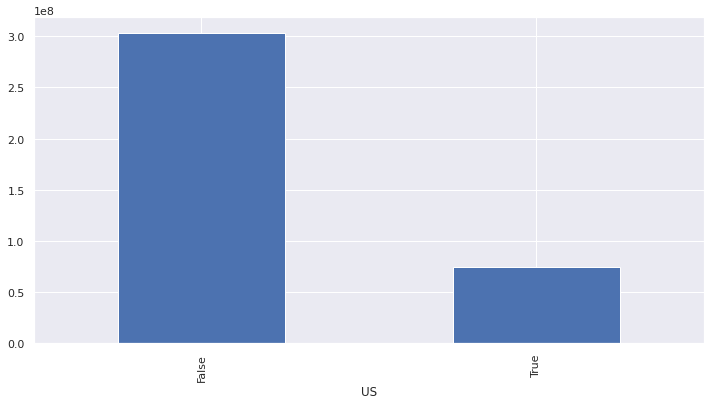

In [ ]:
plt.figure(figsize=(12,6))

confirmed.groupby('US').sum().iloc[:,-1].plot(kind = 'bar');

In [ ]:
#outras formas de mudar os valores é utilizando o where do numpy

import numpy as np

np.where(confirmed['US'], 'US','Others')

array(['Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Others',
       'Others', 'Others', 'Others', 'Others', 'Others', 'Othe

In [ ]:
confirmed['US'] = confirmed['US'].map({True:'US',False:'Others'})

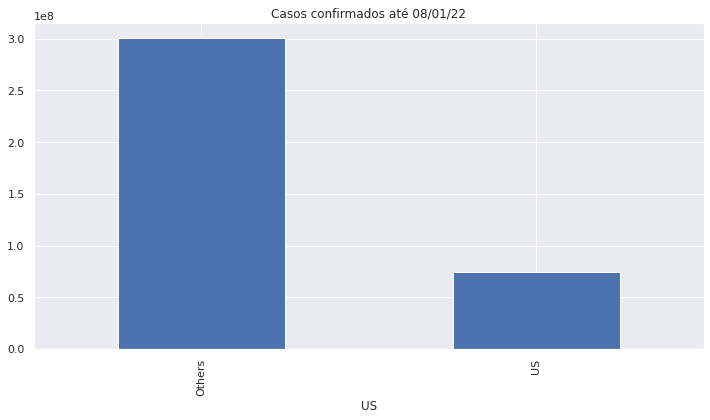

In [ ]:
plt.figure(figsize=(12,6))

confirmed.groupby('US').sum().iloc[:,-2].plot(kind = 'bar')
plt.title('Casos confirmados até 08/01/22');

Text(0.5, 1.0, 'Novos casos confirmados em 08/01/22')

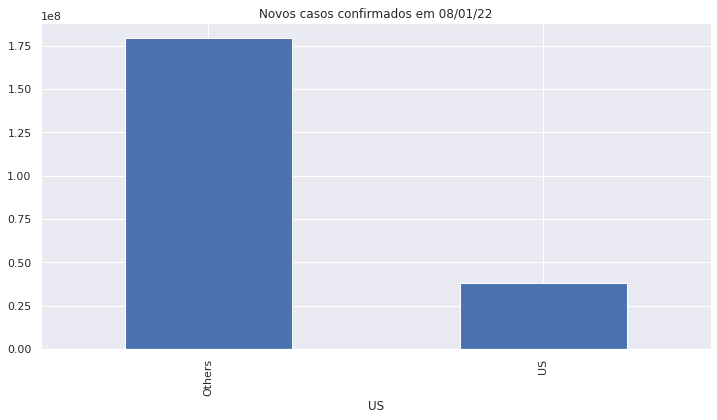

In [ ]:
summed = confirmed.groupby('US').sum()
summed['delta'] = summed['1/8/22'] - summed['1/7/21']
plt.figure(figsize=(12,6))

summed['delta'].plot(kind = 'bar')
plt.title('Novos casos confirmados em 08/01/22')

Text(0.5, 1.0, 'Desenvolvimentos de casos confirmados ao passar do tempo')

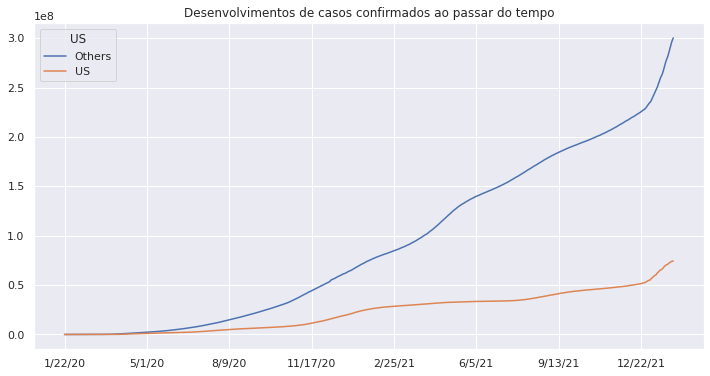

In [ ]:

summed.T[2:-2].plot(figsize = (12,6))

plt.title('Desenvolvimentos de casos confirmados ao passar do tempo')

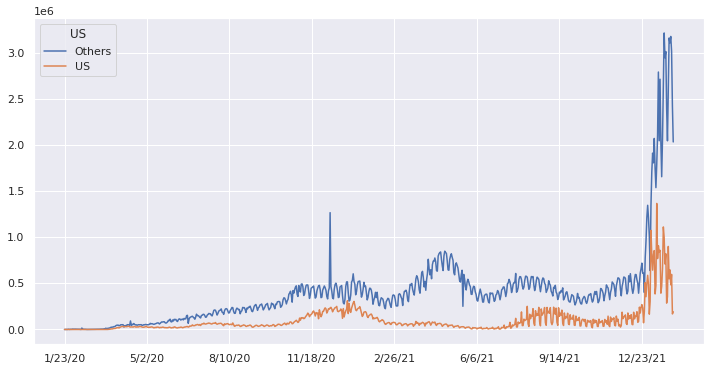

In [ ]:


summed.T[2:-2].diff().dropna().plot(figsize = (12,6))

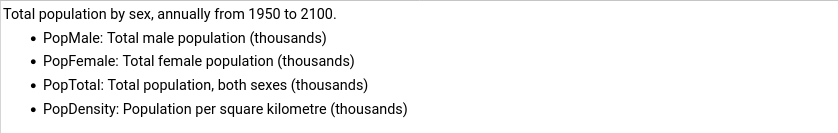

Thousands = milhares, logo vamos adaptar o nosso dataset

In [ ]:
un_population = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv')
un_population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


In [ ]:
un_population['PopTotal'] = un_population['PopTotal'] *1000

In [ ]:
un_population_total = un_population.query('Time == 2021 & Variant == "Medium"')[['Location','PopTotal']].set_index('Location')


In [ ]:
combined.join(un_population_total).sort_values('confirmed',ascending = False)

,confirmed,deaths,recovered,letality_rate_1,PopTotal
US,74951445,887148,0,1.183630,NaN
India,41469499,496242,0,1.196643,1.393409e+09
Brazil,25463530,627589,0,2.464658,2.139934e+08
France,19266496,131937,0,0.684800,6.542618e+07
United Kingdom,17431225,156281,0,0.896558,6.820711e+07
...,...,...,...,...,...
MS Zaandam,9,2,0,22.222222,NaN
Vanuatu,7,1,0,14.285714,3.144640e+05
Marshall Islands,7,0,0,0.000000,5.961800e+04
Tonga,1,0,0,0.000000,1.067590e+05


#Dica super importante

In [ ]:
un_population.query('Location.str.contains("Russia")', engine = 'python')

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
205572,643,Russian Federation,2,Medium,1950,1950.5,44575.785,58222.864,102798649.0,6.277
205573,643,Russian Federation,2,Medium,1951,1951.5,45398.672,58906.026,104304698.0,6.369
205574,643,Russian Federation,2,Medium,1952,1952.5,46295.163,59671.924,105967087.0,6.471
205575,643,Russian Federation,2,Medium,1953,1953.5,47236.274,60491.036,107727310.0,6.578
205576,643,Russian Federation,2,Medium,1954,1954.5,48198.106,61338.398,109536504.0,6.688
...,...,...,...,...,...,...,...,...,...,...
206451,643,Russian Federation,207,Lower 95 PI,2080,2080.5,52308.221,57522.036,109953704.0,6.714
206452,643,Russian Federation,207,Lower 95 PI,2085,2085.5,51781.045,56398.369,108397702.0,6.619
206453,643,Russian Federation,207,Lower 95 PI,2090,2090.5,51178.996,55375.852,106797238.0,6.521
206454,643,Russian Federation,207,Lower 95 PI,2095,2095.5,50493.631,54421.280,105306519.0,6.430


In [ ]:
def locate(pupulation,country):
  return pupulation.query(f'Location.str.contains({str(country)}) and Time == 2020 and Variant == "Medium"', engine = 'python')

In [ ]:
def rename_location(location):
  if location == 'United States of America':
    return 'US'

  if location == 'Russian Federation':
    return 'Russia'
  if location == 'Iran (Islamic Republic of)':
    return 'Iran'
  else:
    return location

    
un_population_total['location_for_who'] = un_population_total.index.map(rename_location)
un_population_total.query('location_for_who == "Iran"').head()

,PopTotal,location_for_who
Location,,
Iran (Islamic Republic of),85028760.0,Iran


In [ ]:
un_population_total = un_population_total.set_index('location_for_who')
un_population_total.head()

,PopTotal
location_for_who,
Afghanistan,3.983543e+07
Africa,1.373486e+09
African Group,1.371687e+09
African Union,1.372299e+09
African Union: Central Africa,1.633018e+08


In [ ]:
combined_expanded = combined.join(un_population_total).sort_values('confirmed',ascending =False)
combined_expanded.dropna().head(10)

,confirmed,deaths,recovered,letality_rate_1,PopTotal
US,74951445,887148,0,1.183630,3.329151e+08
India,41469499,496242,0,1.196643,1.393409e+09
Brazil,25463530,627589,0,2.464658,2.139934e+08
France,19266496,131937,0,0.684800,6.542618e+07
United Kingdom,17431225,156281,0,0.896558,6.820711e+07
Russia,11670366,324672,0,2.782021,1.459120e+08
Turkey,11619882,87416,0,0.752297,8.504274e+07
Italy,10983116,146498,0,1.333847,6.036747e+07
Germany,10025463,117979,0,1.176794,8.390047e+07
Spain,9961253,93225,0,0.935876,4.674521e+07


In [ ]:
combined_expanded['incidence_ratio'] = combined_expanded['confirmed'] / combined_expanded['PopTotal'] *100000
combined_expanded['mortality_rate'] = combined_expanded['deaths'] / combined_expanded['PopTotal'] *100000

In [ ]:
combined_expanded.head(10)

,confirmed,deaths,recovered,letality_rate_1,PopTotal,incidence_ratio,mortality_rate
US,74951445,887148,0,1.183630,3.329151e+08,22513.683174,266.478772
India,41469499,496242,0,1.196643,1.393409e+09,2976.118140,35.613520
Brazil,25463530,627589,0,2.464658,2.139934e+08,11899.210500,293.274877
France,19266496,131937,0,0.684800,6.542618e+07,29447.687277,201.657817
United Kingdom,17431225,156281,0,0.896558,6.820711e+07,25556.315137,229.127126
Russia,11670366,324672,0,2.782021,1.459120e+08,7998.221010,222.512166
Turkey,11619882,87416,0,0.752297,8.504274e+07,13663.579685,102.790672
Italy,10983116,146498,0,1.333847,6.036747e+07,18193.765314,242.677054
Germany,10025463,117979,0,1.176794,8.390047e+07,11949.233277,140.617804
Spain,9961253,93225,0,0.935876,4.674521e+07,21309.675979,199.432194


In [ ]:
confirmed.sort_values('1/30/22', ascending = False).head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,US
255,NaN,US,40.000000,-100.00000,1,1,2,2,5,5,5,6,6,8,8,8,11,11,11,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,16,16,16,16,16,16,...,52082925,52155722,52351414,52860038,53216075,53714478,54302740,54792588,54958865,55262954,56339367,57144882,57789246,58603772,59460479,59846380,60322383,61691256,62461206,63371044,64211440,65070941,65465272,65933232,66595151,67708601,68707224,69417755,70239924,70526042,70881714,71783483,72333439,72980648,73465396,74063641,74232238,74424305,74951445,US
147,NaN,India,20.593684,78.96288,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,34779815,34786802,34793333,34799691,34808886,34822040,34838804,34861579,34889132,34922882,34960261,35018358,35109286,35226386,35368372,35528004,35707727,35875790,35875790,36317927,36317927,36850962,37122164,37380253,37618271,37901241,38218773,38566027,38903731,39237264,39543328,39799202,40085116,40371500,40622709,40858241,41092522,41302440,41469499,Others
30,NaN,Brazil,-14.235000,-51.92530,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,22234623,22238297,22243266,22250218,22259270,22269031,22281649,22291839,22295621,22297427,22309081,22328252,22351104,22386930,22450222,22499525,22529183,22563104,22636359,22724232,22822177,22933289,22981851,23015128,23089509,23229851,23425392,23595178,23766499,23931609,24054405,24142032,24342322,24560093,24789795,25050601,25256198,25360647,25463530,Others
130,NaN,France,46.227600,2.21370,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,...,8779840,8884451,8912148,8941762,9121078,9323371,9529614,9761814,9980940,10039372,10106833,10371017,10693911,10952698,11275841,11579510,11875607,11963184,12322734,12655210,12956857,13279505,13604085,13882214,13971316,14432833,14864061,15254588,15652063,16041383,16342997,16446852,16948487,17310548,17696796,18048584,18380982,18630430,18713087,Others
270,NaN,United Kingdom,55.378100,-3.43600,0,0,0,0,0,0,0,0,0,2,2,2,8,8,9,9,9,13,14,14,15,16,17,18,18,18,19,19,20,22,23,23,28,30,34,37,...,11891292,12013153,12132098,12239797,12377822,12559926,12748050,12937886,13100458,13235401,13422815,13641520,13835334,14015065,14193228,14333794,14475192,14617314,14732594,14862138,14967817,15066395,15147120,15217280,15305410,15399300,15506750,15613283,15709059,15784488,15859288,15953685,16047716,16149319,16245474,16333980,16406123,16468522,17315893,Others


In [ ]:
confirmed.set_index('Province/State').loc['Hubei']['1/30/22']

68320

In [ ]:
hubei_population = 59020000

confirmed_cases = confirmed.set_index('Province/State').loc['Hubei']['1/30/22']
death_cases = deaths.set_index('Province/State').loc['Hubei']['1/30/22']
recovered_cases = recovered.set_index('Province/State').loc['Hubei']['1/30/22']

letality_rate_1 = death_cases / confirmed_cases * 100
letality_rate_2 = death_cases / (death_cases + confirmed_cases) * 100

print(f'Letality rate 1: {letality_rate_1}%')
print(f'Letality rate 2: {letality_rate_2}%')

Letality rate 1: 6.604215456674472%
Letality rate 2: 6.195079086115992%
